In [1]:
import sys
sys.path.append('..')

from src.config import load_config
from src.load_data import load_data, get_class_dist
from src.splits import save_splits, load_splits_meta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
config = load_config()

train_dataset, val_dataset, test_dataset = load_data(split_data=True)
total = len(train_dataset) + len(val_dataset) + len(test_dataset)

print(f"\n{'='*50}")
print(f"Total Images per Split:")
print(f"{'='*50}")
print(f"Train: {len(train_dataset):4d} images ({len(train_dataset) / total * 100:.2f}%)")
print(f"Val:   {len(val_dataset):4d} images ({len(val_dataset) / total * 100:.2f}%)")
print(f"Test:  {len(test_dataset):4d} images ({len(test_dataset) / total * 100:.2f}%)")
print(f"Total: {total:4d} images")
print(f"{'='*50}")


Total Images per Split:
Train: 3537 images (69.98%)
Val:    758 images (15.00%)
Test:   759 images (15.02%)
Total: 5054 images


In [3]:
train_dist = get_class_dist(train_dataset)
val_dist = get_class_dist(val_dataset)
test_dist = get_class_dist(test_dataset)

class_names = list(train_dist.keys())

print(f"\n{'='*80}")
print(f"Class Balance Verification")
print(f"{'='*80}")
print(f"{'Class':<12} | {'Train':>15} | {'Val':>15} | {'Test':>15}")
print(f"{'-'*12}-+-{'-'*15}-+-{'-'*15}-+-{'-'*15}")

for class_name in class_names:
    train_count = train_dist[class_name]
    val_count = val_dist[class_name]
    test_count = test_dist[class_name]
    
    train_pct = (train_count / len(train_dataset)) * 100
    val_pct = (val_count / len(val_dataset)) * 100
    test_pct = (test_count / len(test_dataset)) * 100
    
    print(f"{class_name:<12} | {train_count:4d} ({train_pct:5.1f}%) | {val_count:4d} ({val_pct:5.1f}%) | {test_count:4d} ({test_pct:5.1f}%)")

print(f"{'-'*12}-+-{'-'*15}-+-{'-'*15}-+-{'-'*15}")
print(f"{'Total':<12} | {len(train_dataset):4d} (100.0%) | {len(val_dataset):4d} (100.0%) | {len(test_dataset):4d} (100.0%)")
print(f"{'='*80}")


Class Balance Verification
Class        |           Train |             Val |            Test
-------------+-----------------+-----------------+----------------
cardboard    |  580 ( 16.4%) |  110 ( 14.5%) |  116 ( 15.3%)
glass        |  705 ( 19.9%) |  143 ( 18.9%) |  154 ( 20.3%)
metal        |  585 ( 16.5%) |  116 ( 15.3%) |  119 ( 15.7%)
paper        |  821 ( 23.2%) |  187 ( 24.7%) |  180 ( 23.7%)
plastic      |  647 ( 18.3%) |  166 ( 21.9%) |  151 ( 19.9%)
trash        |  199 (  5.6%) |   36 (  4.7%) |   39 (  5.1%)
-------------+-----------------+-----------------+----------------
Total        | 3537 (100.0%) |  758 (100.0%) |  759 (100.0%)


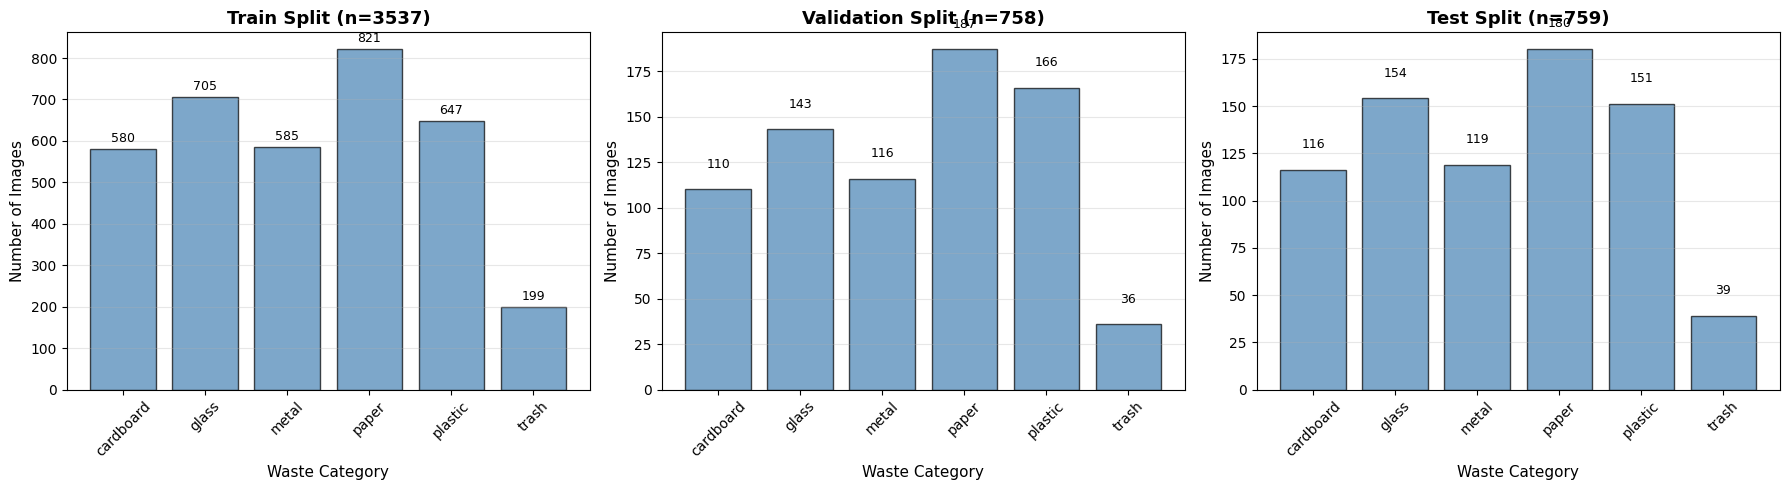

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

splits = [('Train', train_dist, len(train_dataset)), 
          ('Validation', val_dist, len(val_dataset)), 
          ('Test', test_dist, len(test_dataset))]

for ax, (split_name, dist, total) in zip(axes, splits):
    classes = list(dist.keys())
    counts = list(dist.values())
    
    bars = ax.bar(classes, counts, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Waste Category', fontsize=11)
    ax.set_ylabel('Number of Images', fontsize=11)
    ax.set_title(f'{split_name} Split (n={total})', fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    for i, (cls, count) in enumerate(zip(classes, counts)):
        ax.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [5]:
splits_info = save_splits(train_dataset, val_dataset, test_dataset, config)

print(f"\n✓ Splits saved to {config['paths']['splits_dir']}")
print(f"\nFiles created:")
print(f"  - train_indices.txt ({splits_info['train_size']} samples)")
print(f"  - val_indices.txt ({splits_info['val_size']} samples)")
print(f"  - test_indices.txt ({splits_info['test_size']} samples)")
print(f"  - splits.json (complete metadata)")


✓ Splits saved to data/splits

Files created:
  - train_indices.txt (3537 samples)
  - val_indices.txt (758 samples)
  - test_indices.txt (759 samples)
  - splits.json (complete metadata)


## Final Summary

In [6]:
total_images = splits_info['total']

print(f"\n{'='*60}")
print(f"FINAL SPLIT SUMMARY")
print(f"{'='*60}")
print(f"\nDataset: {splits_info['dataset_name']}")
print(f"Random Seed: {splits_info['seed']}")
print(f"\nSplit Distribution:")
print(f"  Training:   {splits_info['train_size']:4d} images ({splits_info['train_size']/total_images*100:.1f}%)")
print(f"  Validation: {splits_info['val_size']:4d} images ({splits_info['val_size']/total_images*100:.1f}%)")
print(f"  Test:       {splits_info['test_size']:4d} images ({splits_info['test_size']/total_images*100:.1f}%)")
print(f"  Total:      {total_images:4d} images")
print(f"\nNumber of Classes: {config['data']['num_classes']}")
print(f"Classes: {', '.join(config['data']['classes'])}")
print(f"\nSplit files saved to: {config['paths']['splits_dir']}")
print(f"{'='*60}")


FINAL SPLIT SUMMARY

Dataset: garythung/trashnet
Random Seed: 42

Split Distribution:
  Training:   3537 images (70.0%)
  Validation:  758 images (15.0%)
  Test:        759 images (15.0%)
  Total:      5054 images

Number of Classes: 6
Classes: cardboard, glass, metal, paper, plastic, trash

Split files saved to: data/splits
